In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import devtools
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [34]:
data = pd.read_csv('./data/raw/life_expectancy_data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            185
percentage expenditure               0
Hepatitis B                        525
Measles                              0
BMI                                 33
under-five deaths                    0
Polio                               18
Total expenditure                  215
Diphtheria                          18
HIV/AIDS                             0
GDP                                415
Population                         604
thinness  1-19 years                33
thinness 5-9 years                  33
Income composition of resources    155
Schooling                          151
dtype: int64

In [4]:
data['Adult Mortality'] = data['Adult Mortality'].fillna(data['Adult Mortality'].mean())
data['Life expectancy'] = data['Life expectancy'].fillna(data['Life expectancy'].mean())
data['Alcohol'] = data['Alcohol'].fillna(data['Alcohol'].mean())
data['Hepatitis B'] = data['Hepatitis B'].fillna(data['Hepatitis B'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['Polio'] = data['Polio'].fillna(data['Polio'].mean())
data['Total expenditure'] = data['Total expenditure'].fillna(data['Total expenditure'].mean())
data['Diphtheria'] = data['Diphtheria'].fillna(data['Diphtheria'].mean())
data['GDP'] = data['GDP'].fillna(data['GDP'].mean())
data['thinness  1-19 years'] = data['thinness  1-19 years'].fillna(data['thinness  1-19 years'].mean())
data['thinness 5-9 years'] = data['thinness 5-9 years'].fillna(data['thinness 5-9 years'].mean())
data['Population'] = data['Population'].fillna(data['Population'].mean())
data['Income composition of resources'] = data['Income composition of resources'].fillna(data['Income composition of resources'].mean())
data['Schooling'] = data['Schooling'].fillna(data['Schooling'].mean())
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [5]:
df_copy = data.copy()
df_copy['Status'] = df_copy['Status'] != "Developing"# True для оцененных, False для неоцененных
df_copy['Status'] = df_copy['Status'].replace("Developing", float('nan'))  # Заменим -1 на NaN для подсчета среднего
df_copy['Status'] = df_copy['Status'].astype('int')
df_copy.head(120)    

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Australia,2005,1,81.0,67.0,1,10.30,579.133164,95.0,10,...,92.0,8.45,92.0,0.1,3416.714830,23948.0,0.7,0.6,0.910,20.3
116,Australia,2004,1,86.0,69.0,1,9.84,588.568371,95.0,70,...,92.0,8.57,92.0,0.1,3472.379770,21274.0,0.7,0.6,0.908,20.7
117,Australia,2003,1,83.0,71.0,1,9.97,3829.550928,95.0,91,...,92.0,8.32,93.0,0.1,23465.385590,198954.0,0.7,0.7,0.905,20.6
118,Australia,2002,1,79.9,73.0,1,9.84,46.387182,95.0,32,...,92.0,8.39,92.0,0.1,281.817630,196514.0,0.7,0.7,0.902,20.1


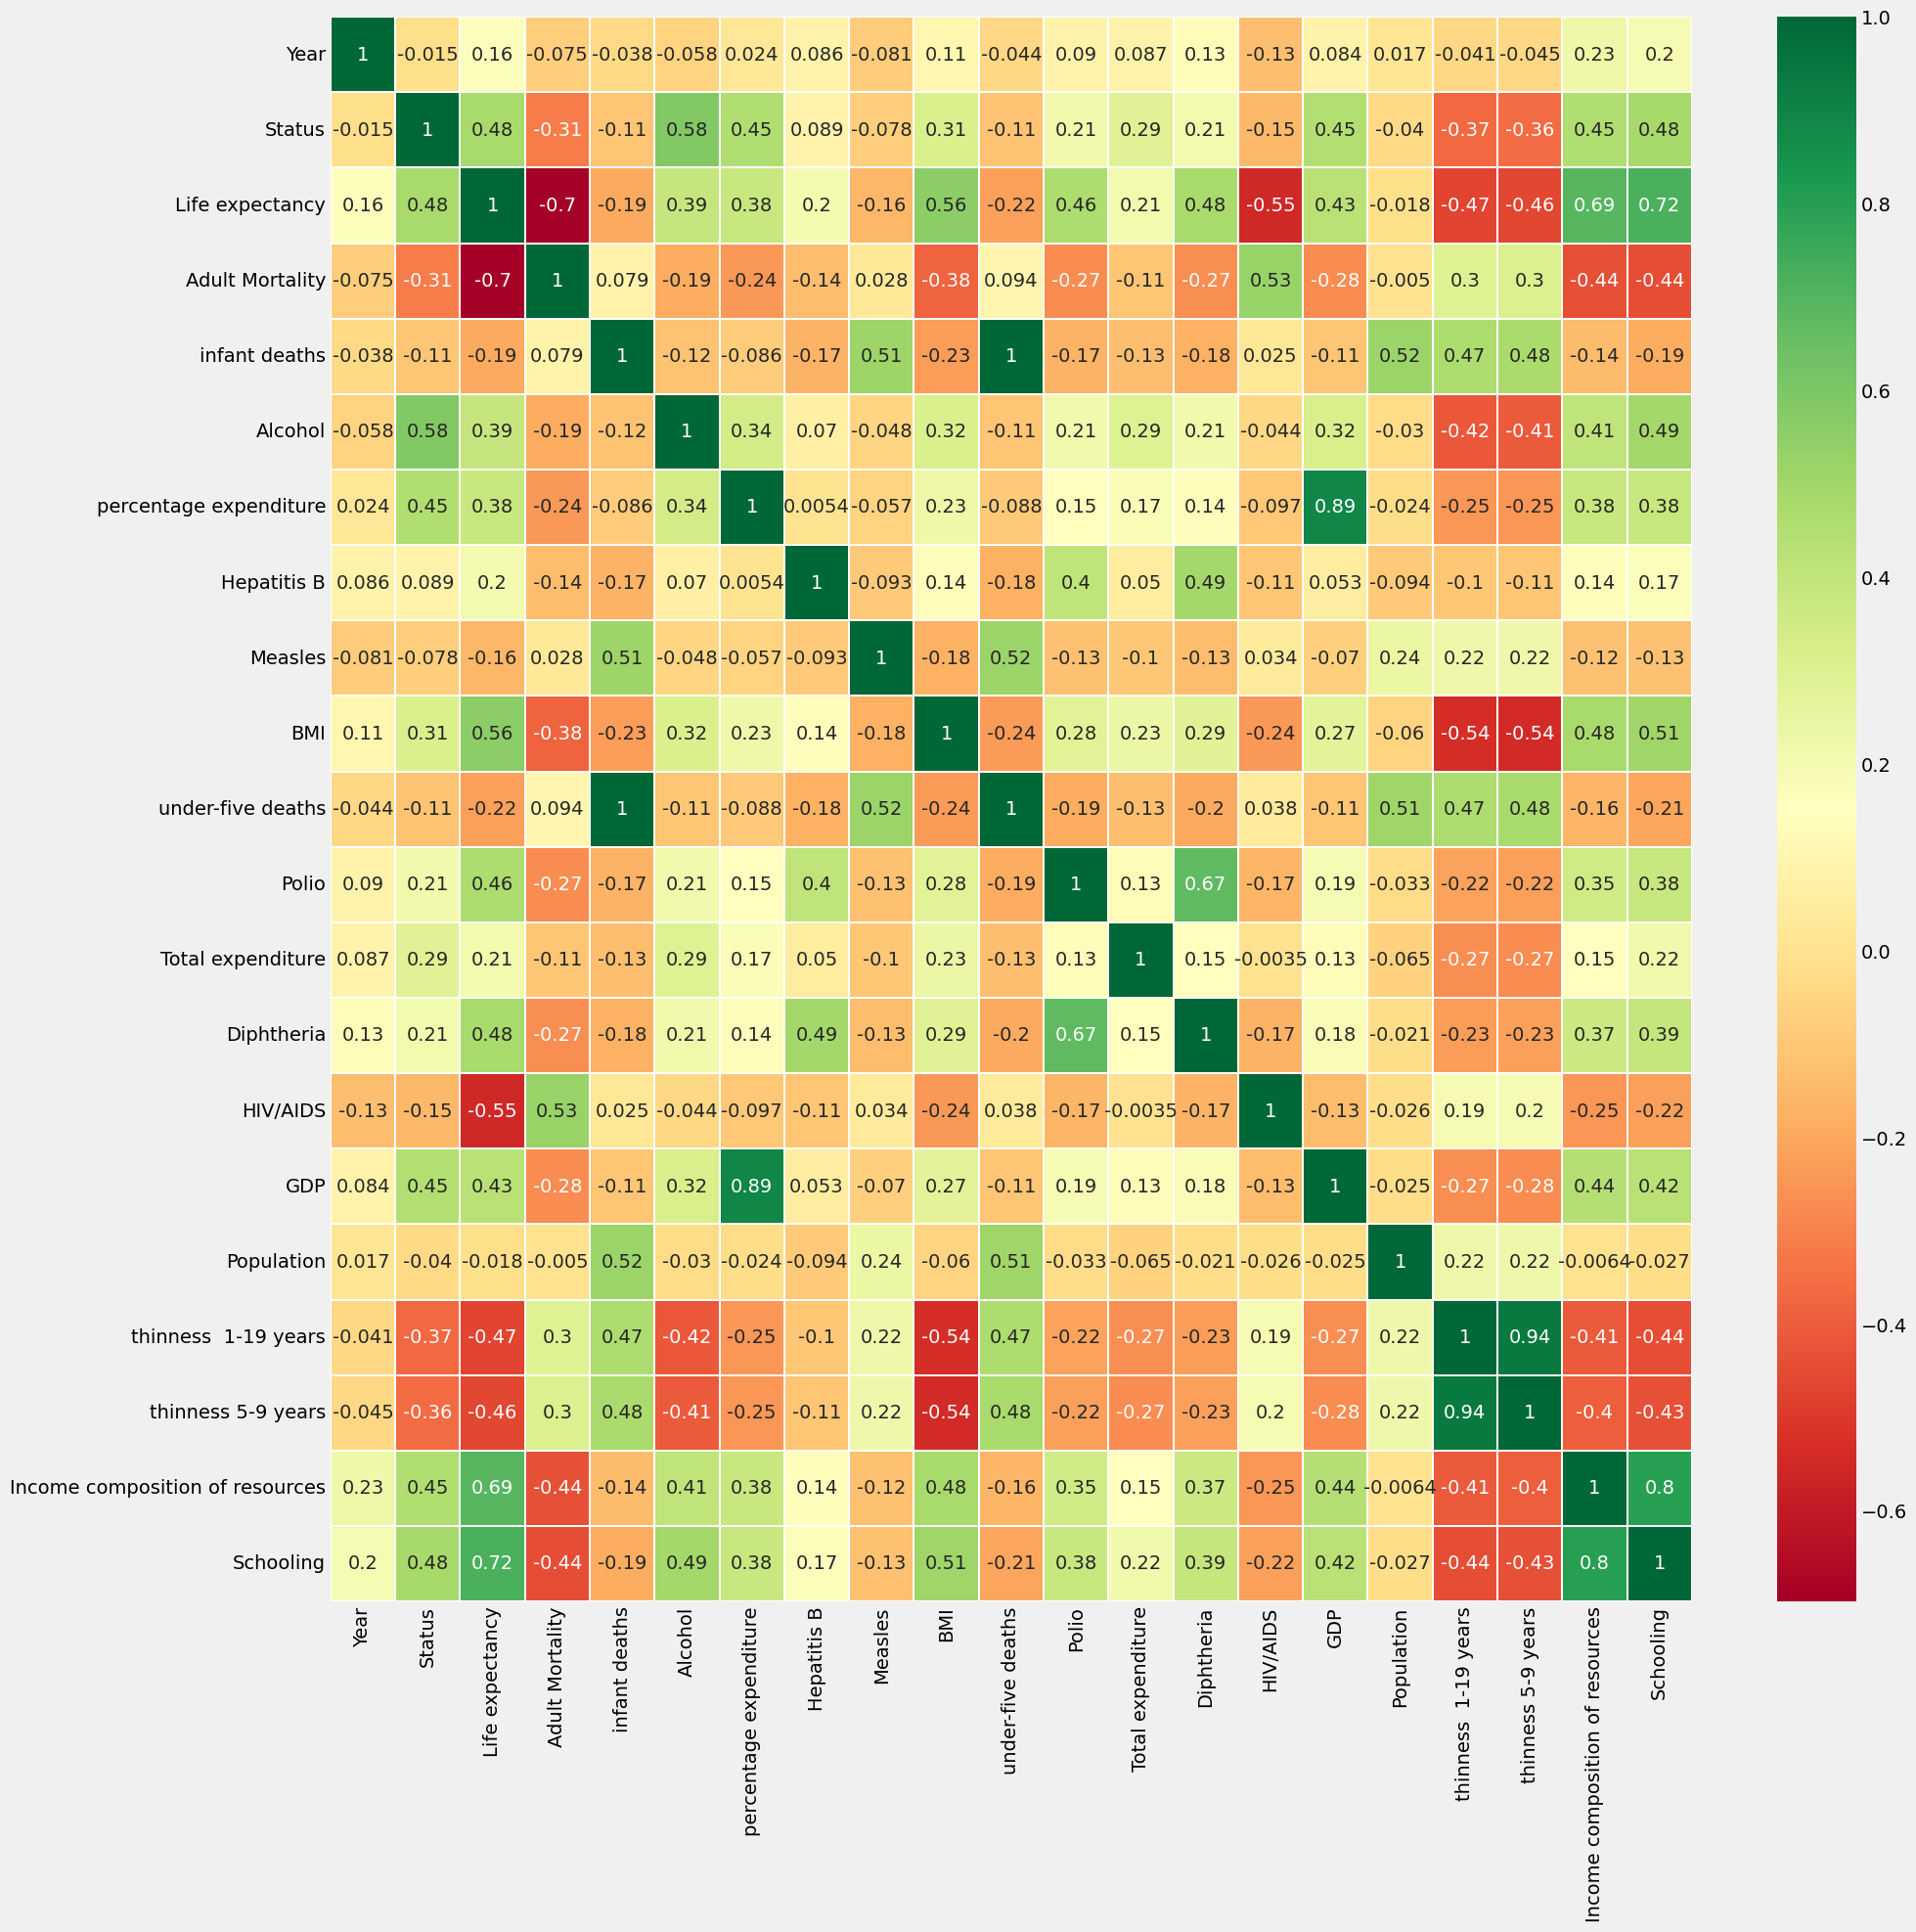

In [6]:
plt.figure(figsize=(20,20))
data1 = df_copy.drop(columns=["Country"])
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
plt.show()

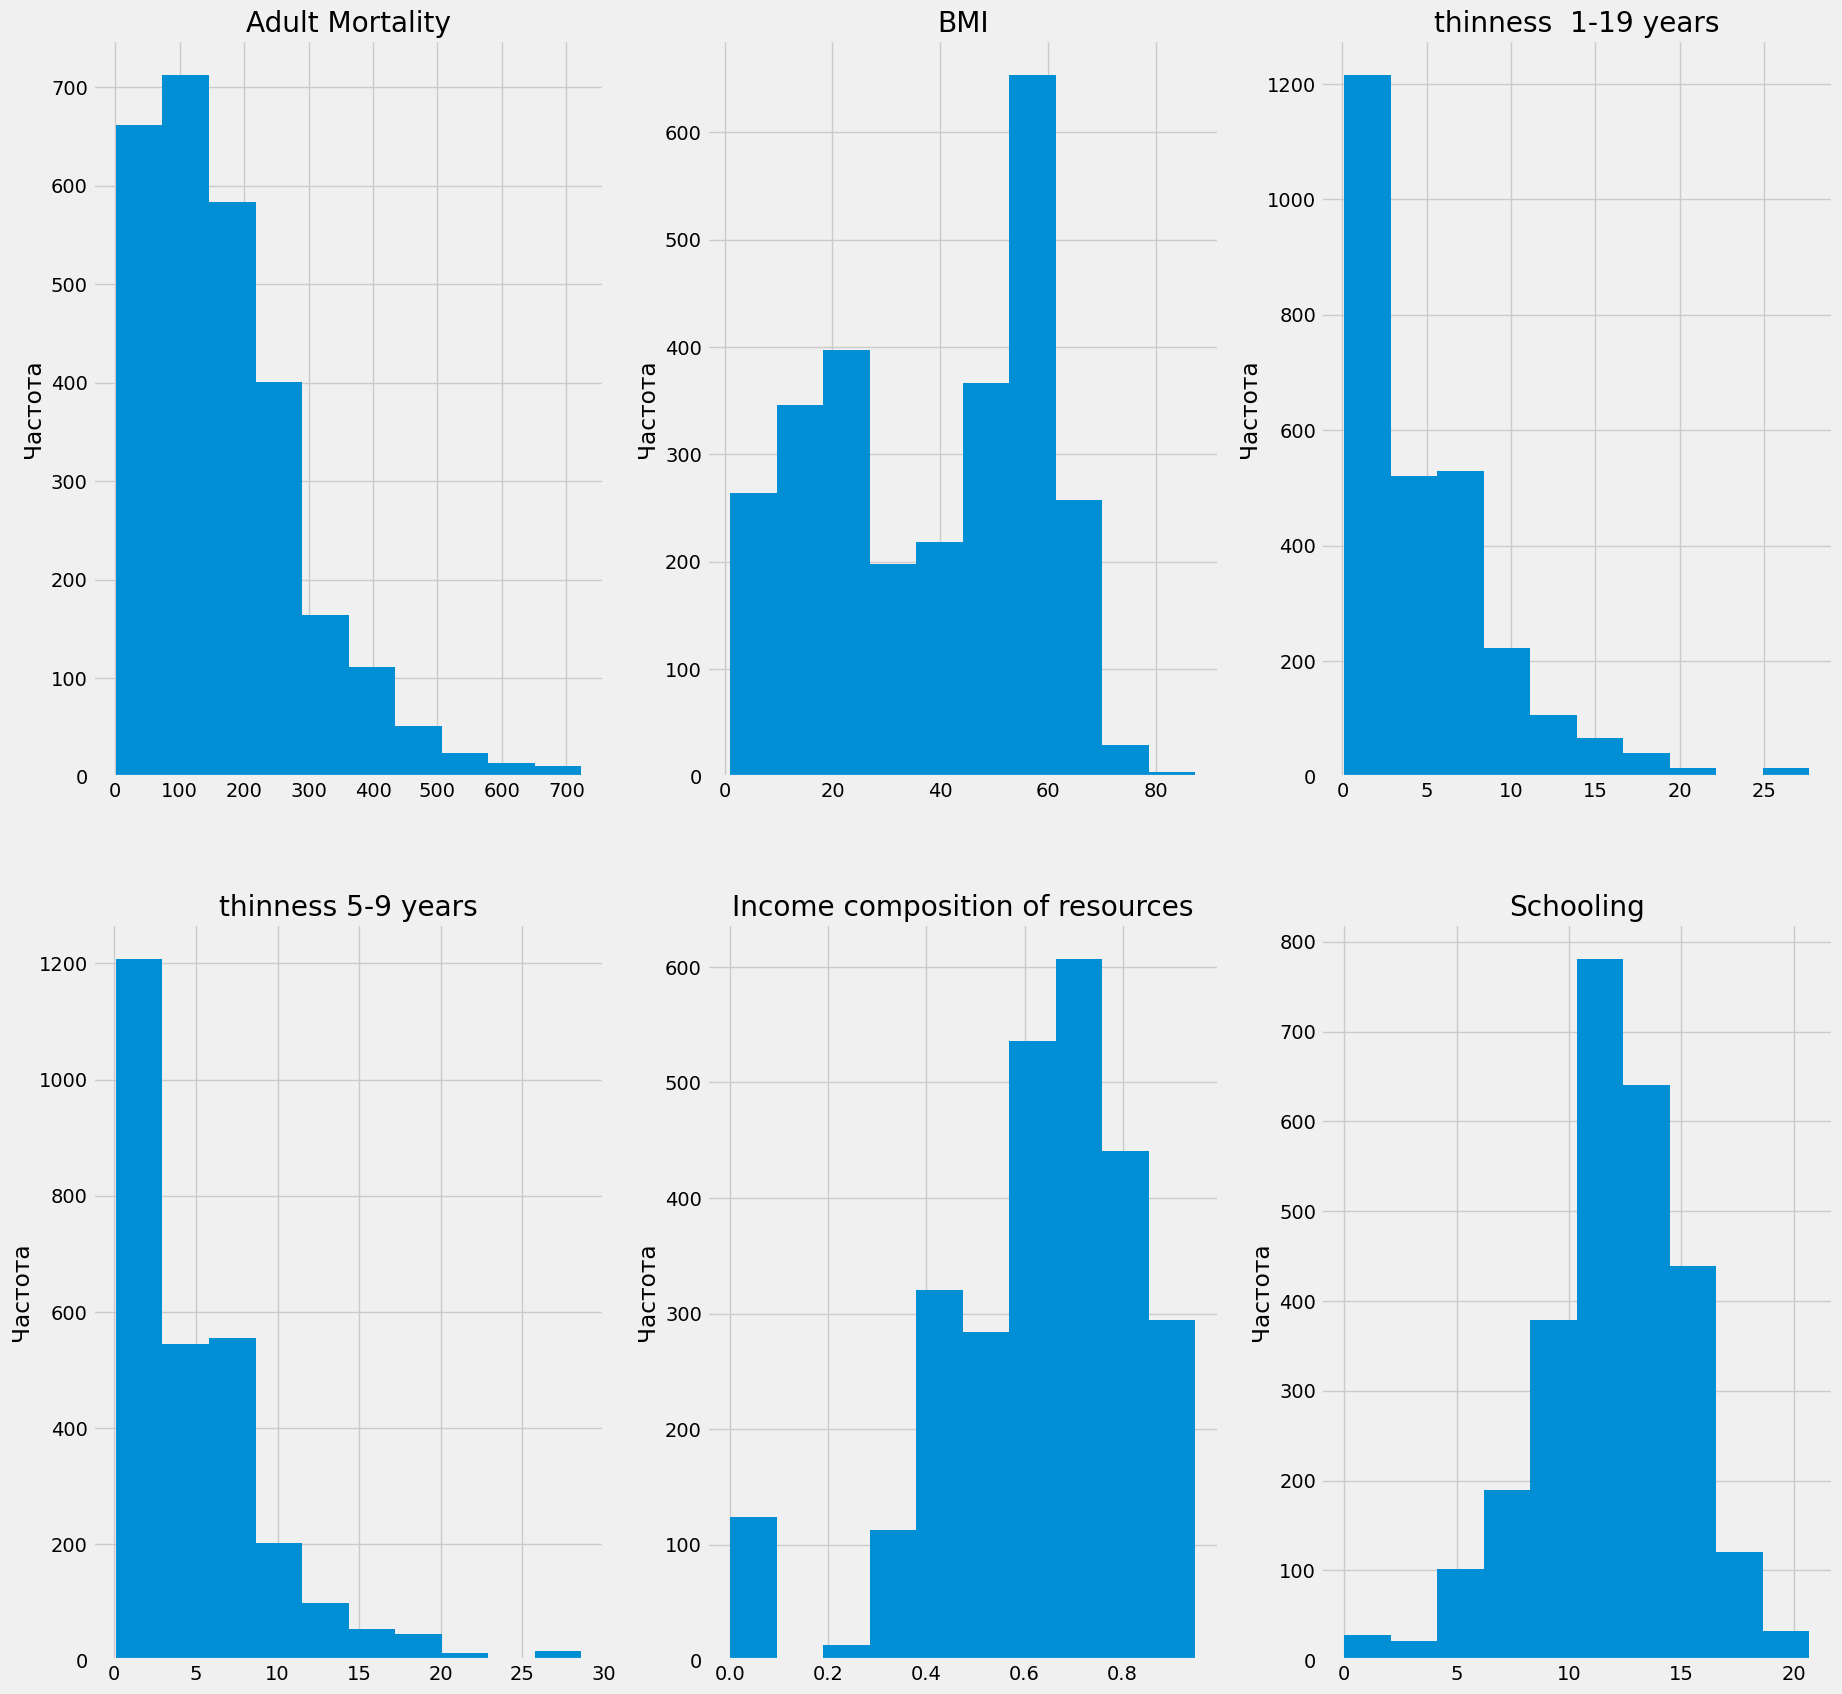

In [7]:
plt.figure(figsize=(20,20))
data1 = [data['Adult Mortality'], data['BMI'], data['thinness  1-19 years'], 
         data['thinness 5-9 years'], data['Income composition of resources'], data['Schooling']]
name = ['Adult Mortality','BMI','thinness  1-19 years','thinness 5-9 years','Income composition of resources', 'Schooling']
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.hist(data1[i])
    plt.ylabel('Частота')
    plt.title(name[i])
plt.show()

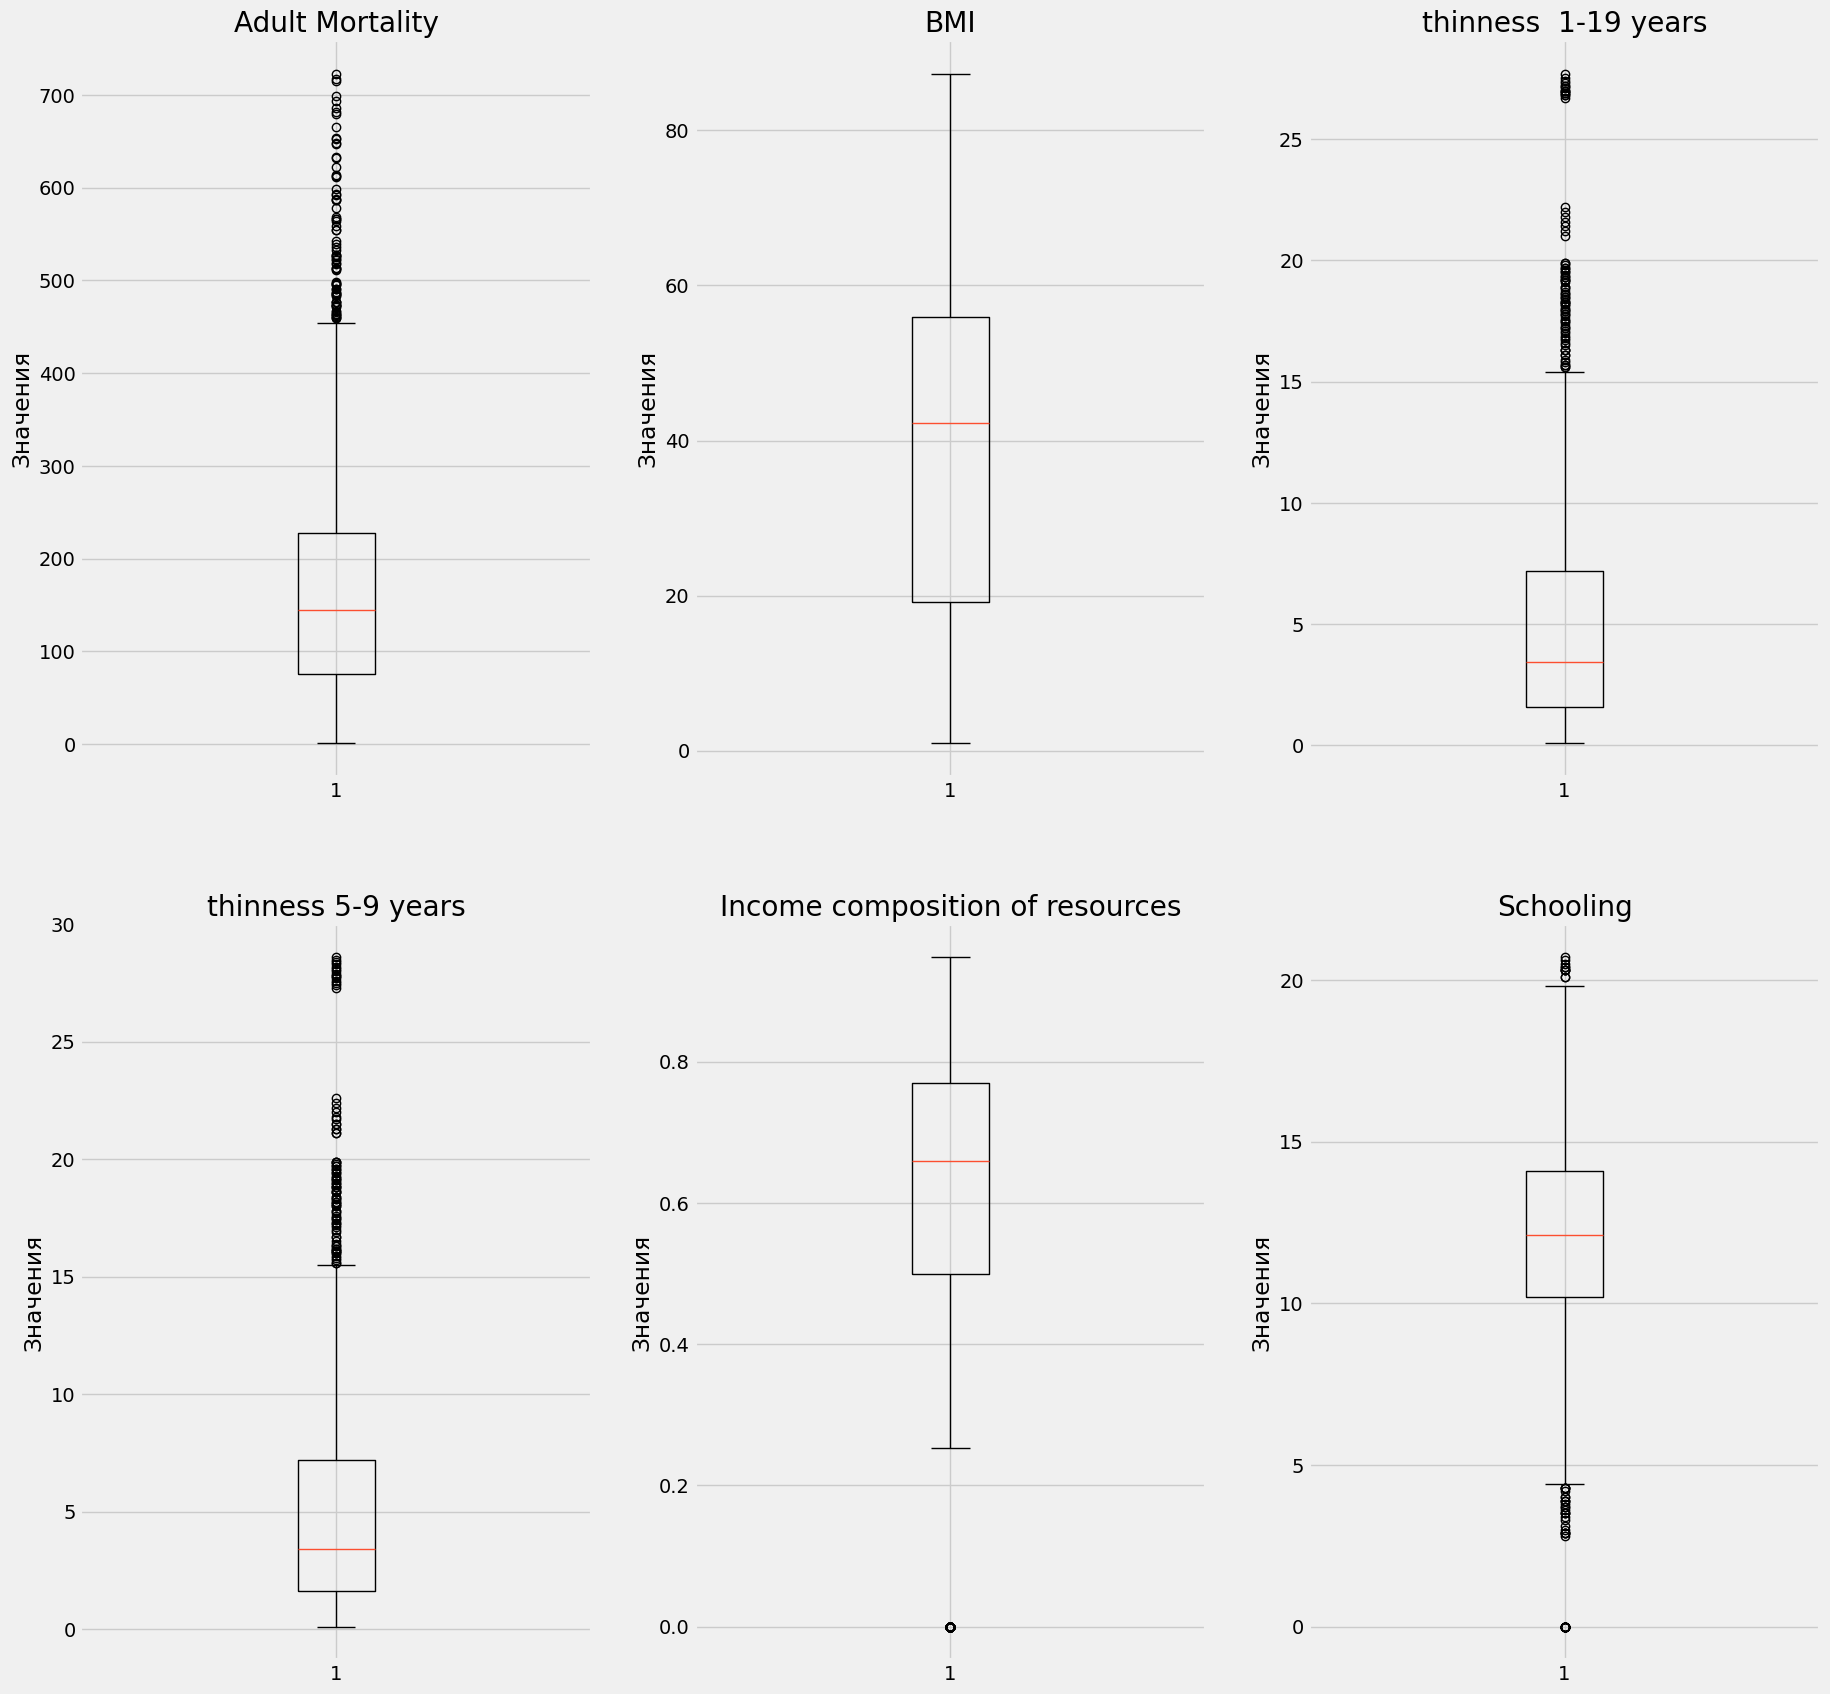

In [8]:
plt.figure(figsize=(20,20))
data1 = [data['Adult Mortality'], data['BMI'], data['thinness  1-19 years'], 
         data['thinness 5-9 years'], data['Income composition of resources'], data['Schooling']]
name = ['Adult Mortality','BMI','thinness  1-19 years','thinness 5-9 years','Income composition of resources', 'Schooling']
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.boxplot(data1[i])
    plt.ylabel('Значения')
    plt.title(name[i])
plt.show()

Text(0.5, 1.0, 'Диаграмма рассеяния')

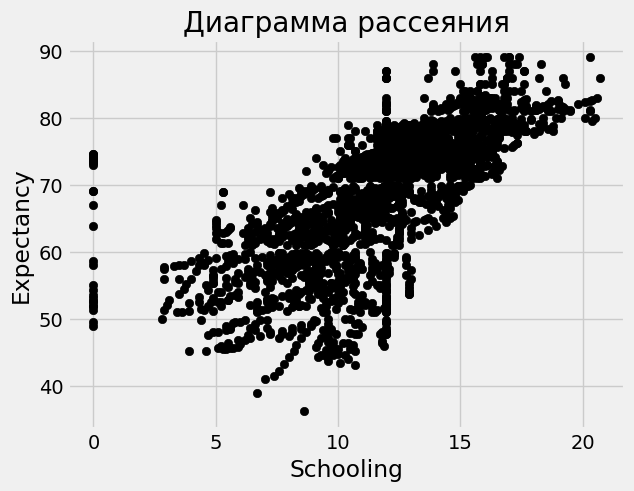

In [13]:
plt.scatter(data['Schooling'], data['Life expectancy'], color='black')
plt.xlabel('Schooling')
plt.ylabel('Expectancy')
plt.title('Диаграмма рассеяния')

## **Линейная регрессия**

### **Стандартизация**

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
adult_mortality = scaler.fit_transform(data[['Adult Mortality']]) #schooling|income|BMI|Status
life_expectancy = scaler.fit_transform(data[['Life expectancy']])
bmi = scaler.fit_transform(data[['BMI']])
thi_19 = scaler.fit_transform(data[['thinness  1-19 years']])
thi_9 = scaler.fit_transform(data[['thinness 5-9 years']])
income_resources = scaler.fit_transform(data[['Income composition of resources']])
schooling = scaler.fit_transform(data[['Schooling']])

In [15]:
from sklearn.linear_model import LinearRegression

simple_lr = LinearRegression()
simple_lr.fit(schooling, data[['Life expectancy']])
predicted_life = simple_lr.predict(schooling)

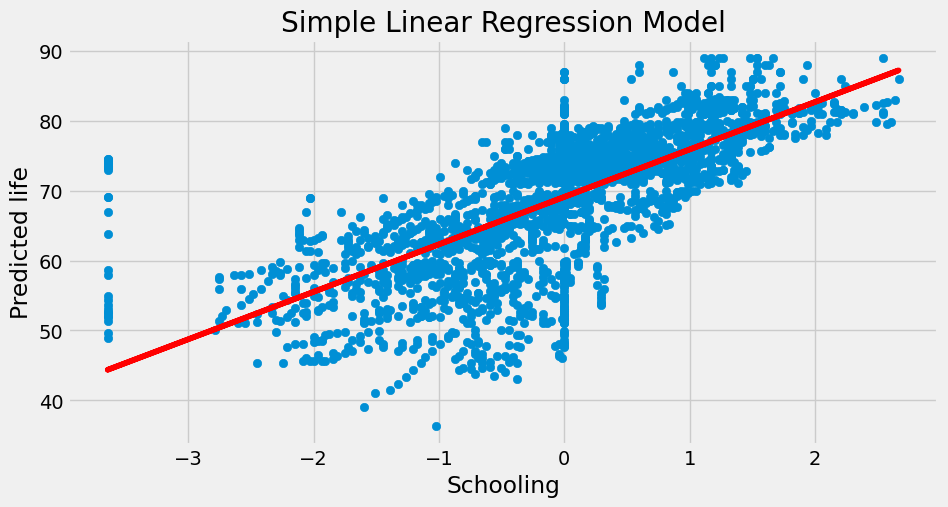

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(schooling, data[['Life expectancy']])
plt.plot(schooling, predicted_life, c = 'r')
plt.title('Simple Linear Regression Model')
plt.ylabel("Predicted life")
plt.xlabel("Schooling")
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(simple_lr,
                      adult_mortality,
                      data[['Life expectancy']],
                      scoring='neg_mean_squared_error',
                      cv=10)

mse.mean()

-46.785829760520826

### **Другая линейная регрессия**

In [35]:
#data_true = data.drop(columns=['Country','Year'])
data1 = data.drop(columns = ["Country", "Year", "Life expectancy", "Adult Mortality", "Alcohol", "Measles", "Hepatitis B", "infant deaths", 
                             "Polio", "under-five deaths", "Diphtheria", "HIV/AIDS", "Population", "GDP", "percentage expenditure", 
                             "Total expenditure", "thinness 5-9 years", "thinness 1-19 years"])
#schooling|income|BMI|Status
data1.head()

,Status,BMI,Income composition of resources,Schooling
0,Developing,19.1,0.479,10.1
1,Developing,18.6,0.476,10.0
2,Developing,18.1,0.470,9.9
3,Developing,17.6,0.463,9.8
4,Developing,17.2,0.454,9.5


In [206]:
from sklearn.model_selection import train_test_split
X = [[adult_mortality], [bmi], [thi_19], [thi_9], [income_resources], [schooling]]
y = data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




ValueError: Found input variables with inconsistent numbers of samples: [6, 2732]

In [207]:
import pandas as pd

# Загрузка данных
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Просмотр первых строк данных
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
